# Libraries

In [1]:
from __future__ import division, print_function

import os
import numpy as np
from numpy.polynomial.polynomial import polyval
import scipy.io as sio
import matplotlib.pyplot as plt
import math
from math import pi

from lib import *

from IPython.display import clear_output
%matplotlib inline

# Directories

In [2]:
# Data files
name_folder = 'matlab3'

# Directory
dir_main = os.getcwd()
dir_data = os.path.join(dir_main, 'data', name_folder)

# List files
mat_list = os.listdir(dir_data)

# Import data

In [3]:
# Asymptotic percentage
asy = 0.1
asy_phases_list = {}

for k in range(len(mat_list)):
    dir_mat = os.path.join(dir_data, mat_list[k])
    dict_mat = sio.loadmat(dir_mat)
    
    # Refresh solution
    sol = {}
    sol['t'] = np.reshape(dict_mat['t'], -1)
    sol['y'] = dict_mat['y']
    sol['yp'] = dict_mat['yp']
    
    # Compute the global frequency:
    arr_omega = asylib.weight_avg(sol['t'], sol['yp'], asy)
    Omega = np.sum(arr_omega) / arr_omega.size

    # Get array of asymptotic phases:
    arr_lin = Omega*sol['t']
    arr_lin = arr_lin[:,None]

    arr_diff = sol['y'] - arr_lin
    asy_phases = asylib.weight_avg(sol['t'], arr_diff, asy)
    
    # Store
    asy_phases_list[k] = asy_phases

# Plot phases

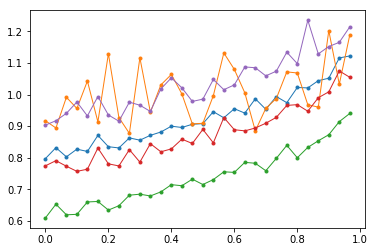

In [4]:
fig, ax = plt.subplots(1,1)

# Figure options
pltopts = {'linestyle': '-',
           'linewidth': 1.0,
           'marker': '.',
          }

# Arrays
# asy_phases_sort = asy_phases # np.sort(asy_phases)
asy_inds = np.arange(asy_phases.size)/asy_phases.size

for key in asy_phases_list.keys():
    ax.plot(asy_inds, asy_phases_list[key], **pltopts)